In [1]:
import scipy.integrate as spi
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

In [13]:

nlines=5
rainbow=cmap=plt.get_cmap('rainbow')
line_colors = cmap(np.linspace(0,1,nlines))

In [55]:
def SIS_SI(INP,t):  

    Y=np.zeros((4))
    V = INP   
    #susceptible hosts
    Y[0] = nu[0] - V[0] * r * (beta[0][1]*V[3]) - mu[0] * V[0]
    #susceptible mosquitos
    Y[1] = nu[1] - V[1] * r * (beta[1][0]*V[2]) - mu[1] * V[1]
    #infected hosts
    Y[2] = V[0] * r * (beta[0][1]*V[3]) - gamma[0] * V[2] - mu[0] * V[2]
    #infected mosquitos
    Y[3] = V[1] * r * (beta[1][0]*V[2]) - mu[1] * V[3]
    return Y

In [56]:
r=0.5/1e3;
beta=np.array([[0, 0.5], [0.8, 0]]);
gamma=np.array([0.033, 0]);
mu=np.array([5.5e-5, 0.143]);
nu=np.array([5.5e-2, 1.443e3]);
X0=np.array([1e3, 1e4]);
Y0=np.array([1, 1]);
ND=MaxTime=1000.0;
TS=1.0

INPUT=np.hstack((X0,Y0))


t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(SIS_SI,INPUT,t_range)

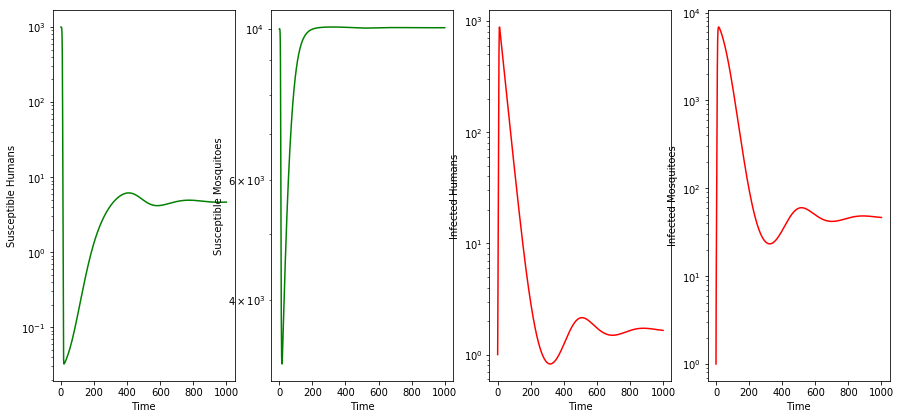

In [57]:
plt.figure(figsize=(15,15))
plt.subplot(241)
plt.semilogy(RES[:,0], 'g', label='SH')
plt.xlabel('Time')
plt.ylabel('Susceptible Humans')
plt.subplot(242)
plt.semilogy(RES[:,1], 'g', label='SM')
plt.xlabel('Time')
plt.ylabel('Susceptible Mosquitoes')
plt.subplot(243)
plt.semilogy(RES[:,2], 'r', label='IH')
plt.xlabel('Time')
plt.ylabel('Infected Humans')
plt.subplot(244)
plt.semilogy(RES[:,3], 'r', label='IM')
pl.xlabel('Time')
pl.ylabel('Infected Mosquitoes')
plt.show()

In [ ]:

#     0->0
#     1->2
#     2->3
#     3->5
#     4->1
#     5->4

In [74]:
def SIS_SI_mut(INP,t):  

    Y=np.zeros((6))
    V = INP   
    #susceptible hosts
    Y[0] = nu[0]*(N/1e3) - V[0] * r * (beta[0][1]*V[5]) - d[0] * V[0]
    
    #susceptible hosts w mutation
    Y[1] = nu[0]*(mutants/1e3) - V[1] * r * (beta[0][1]*V[5]) - d[0] * V[1]
    
    #susceptible mosquitos
    Y[2] = nu[1] - (V[2] * r * (beta[1][0]*V[3]) + V[2] * r * (beta[1][0]*V[4]) ) - d[1] * V[2]
    
    #infected hosts
    Y[3] = V[0] * r * (beta[0][1]*V[5]) - gamma[0] * V[3] - d[0] * V[3]
    
    #infected hosts w mutation
    Y[4] = V[1] * r * (beta[1][1]*V[5]) - gamma[2] * V[4] - d[0] * V[4]
    
    #infected mosquitos
    Y[5] = V[2] * r * (beta[1][0]*V[3])+ V[2] * r * (beta[1][0]*V[4]) - d[1] * V[5]
    
       
    return Y


In [91]:
mut_recovery=np.linspace(0.0165,0.033,5)
RES_recovery=np.zeros((1001,6,5))

r=0.5/1e3;
mutants=100
N=900
beta=np.array([[0, 0.5], [0.8, 0.8]]);
#gamma=np.array([0.033, 0,0.01]);
d=np.array([5.5e-5, 0.143]);
nu=np.array([5.5e-2, 1.443e3]);
X0=np.array([1e3-mutants,mutants, 1e4,]);
Y0=np.array([1,0, 1]);
ND=MaxTime=1000.0;
TS=1.0
#alpha=1.0
INPUT=np.hstack((X0,Y0))
for i in range(5):
    X0=np.array([1e3-mutants,mutants, 1e4,]);
    Y0=np.array([1,0, 1]);
    ND=MaxTime=1000.0;
    TS=1.0
    #alpha=1.0
    INPUT=np.hstack((X0,Y0))
    gamma=np.array([0.033, 0,mut_recovery[i]]);
    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES_mut = spi.odeint(SIS_SI_mut,INPUT,t_range)
    RES_recovery[:,:,i]=RES_mut

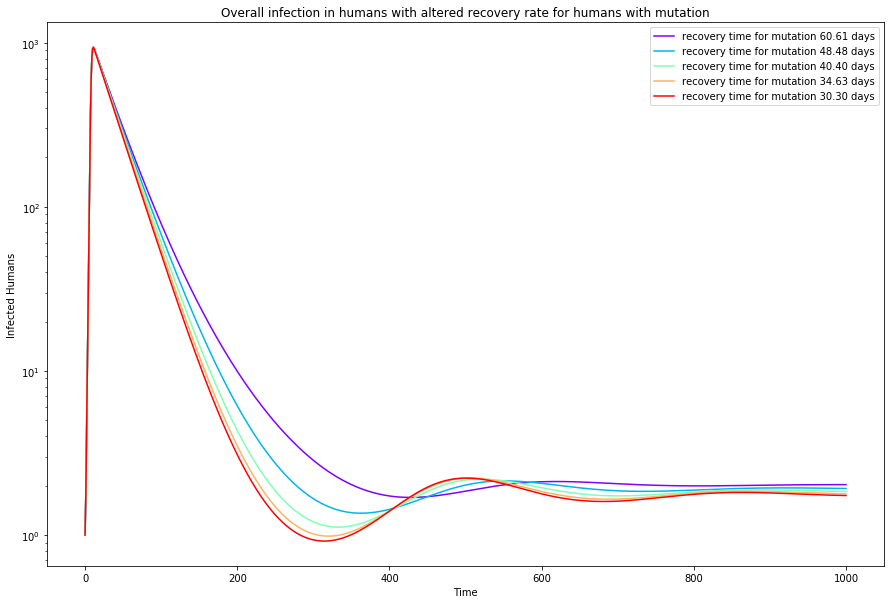

In [92]:
plt.figure(figsize=(15,10))
for i in range(5):
    plt.semilogy(RES_recovery[:,3,i]+RES_recovery[:,4,i], c=line_colors[i], label='recovery time for mutation {0:.2f} days'.format(1/mut_recovery[i]))

plt.xlabel('Time')
plt.ylabel('Infected Humans')
plt.title('Overall infection in humans with altered recovery rate for humans with mutation')

plt.legend()
plt.show()

In [69]:
def SEIS_SI_mut(INP,t):  

    Y=np.zeros((9))
    V = INP   
    #susceptible hosts
    Y[0] = nu[0]*(N/1e3) - V[0] * r * (beta[0][1]*V[8]) - d[0] * V[0]
    
    #susceptible hosts w mutation
    Y[1] = nu[0]*(mutants/1e3) - V[1] * r * (beta[0][1]*V[8]) - d[0] * V[1]
    
    #susceptible mosquitos
    Y[2] = nu[1] - (V[2] * r * (beta[1][0]*V[6]) + V[2] * r * (beta[1][0]*V[7]) ) - d[1] * V[2]
    
    #exposed hosts
    
    Y[3]= V[0] * r * (beta[0][1]*V[8]) -sigma[0]*V[3]- d[0]*V[3]
    
    #exposed hosts w mutation
    
    Y[4] = V[1] * r * (beta[0][1]*V[8]) -sigma[0]*V[4]- d[0]*V[4]
    
    #exposed mosquitos
    
    Y[5]=V[2] * r * (beta[1][0]*V[6]) + V[2] * r * (beta[1][0]*V[7]) -sigma[1]*V[5]- d[1]*V[5]
    
    #infected hosts
    Y[6] = sigma[0]*V[3] - gamma[0] * V[6] - d[0] * V[6]
    
    #infected hosts w mutation
    Y[7] = sigma[0]*V[4] - gamma[2] * V[7] - d[0] * V[7]
    
    #infected mosquitos
    Y[8] = sigma[1]*V[5] - d[1] * V[8]
    
       
    return Y

In [87]:
mut_recovery=np.linspace(0.0165,0.033,5)
RES_recoveryE=np.zeros((1001,9,5))

r=0.5/1e3;
mutants=100
N=900
beta=np.array([[0, 0.5], [0.8, 0]]);
sigma=np.array([0.143,0.143])
d=np.array([5.5e-5, 0.143]);
nu=np.array([5.5e-2, 1.443e3]);
X0=np.array([1e3-mutants,mutants, 1e4,]);
Y0=np.array([1,0, 1]);
ND=MaxTime=1000.0;
TS=1.0
#alpha=1.0
INPUT=np.hstack((X0,Y0))
for i in range(5):
    X0=np.array([1e3-mutants,mutants, 1e4]);
    Y0=np.array([0,0,0,1,0, 1]);
    ND=MaxTime=1000.0;
    TS=1.0
    #alpha=1.0
    INPUT=np.hstack((X0,Y0))
    gamma=np.array([0.033, 0,mut_recovery[i]]);
    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES_mut = spi.odeint(SEIS_SI_mut,INPUT,t_range)
    RES_recoveryE[:,:,i]=RES_mut

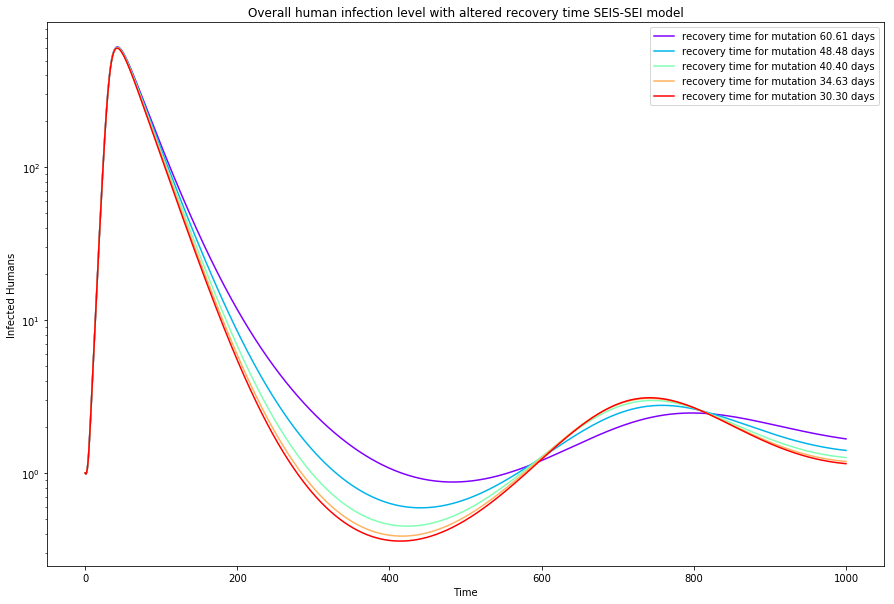

In [88]:
plt.figure(figsize=(15,10))
for i in range(5):
    plt.semilogy(RES_recoveryE[:,6,i]+RES_recoveryE[:,7,i], c=line_colors[i], label='recovery time for mutation {0:.2f} days'.format(1/mut_recovery[i]))

plt.xlabel('Time')
plt.ylabel('Infected Humans')
plt.title('Overall human infection level with altered recovery time SEIS-SEI model')
plt.legend()
plt.show()

In [75]:
mut_transmission=np.linspace(0.8,1.0,5)
RES_transmission=np.zeros((1001,6,5))
r=0.5/1e3;
mutants=100
N=900
#beta=np.array([[0, 0.5], [0.8, 0]]);
gamma=np.array([0.033, 0,0.033]);
mu=np.array([5.5e-5, 0.143]);
nu=np.array([5.5e-2, 1.443e3]);
# X0=np.array([1e3-mutants, 1e4]);
# Y0=np.array([1, 1]);
Z0=[mutants,0];
ND=MaxTime=1000.0;
TS=1.0
# alpha=1.0
# INPUT=np.hstack((X0,Y0))
for i in range(5):
    X0=np.array([1e3-mutants, mutants,1e4]);
    Y0=np.array([1,0, 1]);

    ND=MaxTime=1000.0;
    TS=1.0
    beta=np.array([[0, 0.5], [0.8, mut_transmission[i]]]);
    INPUT=np.hstack((X0,Y0))

    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES_mut = spi.odeint(SIS_SI_mut,INPUT,t_range)
    RES_transmission[:,:,i]=RES_mut

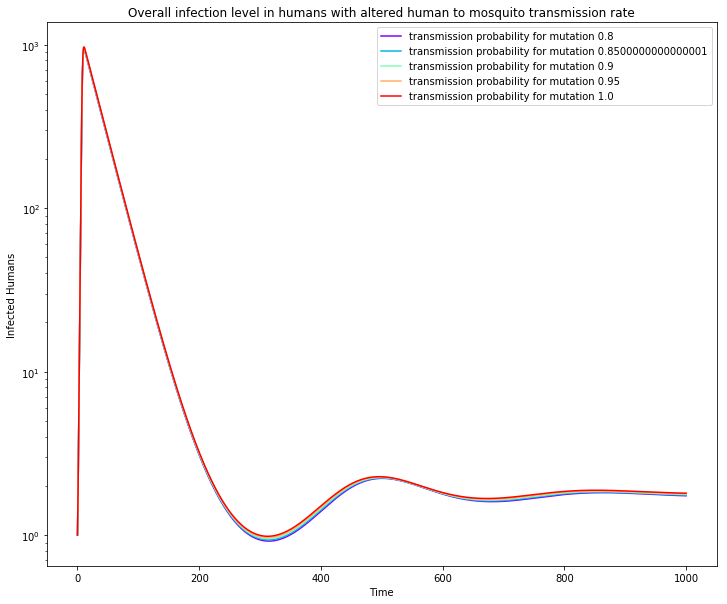

In [82]:
plt.figure(figsize=(12,10))
for i in range(5):
    plt.semilogy(RES_transmission[:,3,i]+RES_transmission[:,4,i], c=line_colors[i], label='transmission probability for mutation {}'.format(mut_transmission[i]))

plt.xlabel('Time')
plt.ylabel('Infected Humans')
plt.title('Overall infection level in humans with altered human to mosquito transmission rate')
plt.legend()
plt.show()